<h2>Tarea autómatas</h2>
<h3>Juan Uriel Legaria Peña</h3>

<h3>1.- Autómata de Wolfram</h3>

Comenzaremos programando el autómata de wolfram

In [1]:
import numpy as np
from enum import Enum
import random
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import clear_output
from random import randrange
from math import gamma;

In [2]:
class WolframAutomaton:
    
    def __init__(self, rule):
        if(rule > 255 or rule < 0):
            print("Regla invalida")
        
        else:
            self.activeCellColor = [1, 0.819, 0.141]
            self.inactiveCellColor = [0.066, 0, 0.341]
            self.ruleName = str(rule)
            binaryRule = bin(rule)
            stringRule = binaryRule[2:]
            leadingZeros = 8-len(stringRule)
            rule =[]
            for i in range(0,leadingZeros):
                rule.append(int(0))
            
            for d in stringRule:
                rule.append(int(d))
            
            self.rule = rule
                
    def evolve(self, steps):
        gridWidth = 2*steps - 1
        gridHeight = steps
        evolutionGrid = np.zeros((gridHeight, gridWidth))
        colorEvolutionGrid = np.zeros((gridHeight, gridWidth, 3))
        evolutionGrid[0,int(np.floor(gridWidth/2))] = 1
        #Para cada paso 
        for i in range(1, gridHeight):
            #Para cada celda
            for j in range(1, gridWidth-1):
                index = int(evolutionGrid[i-1,j-1]*2**(0) + evolutionGrid[i-1,j]*2**(1) + evolutionGrid[i-1,j+1]*2**(2))
                newState = self.rule[index]
                evolutionGrid[i,j] = newState
                if(newState == 0):
                    colorEvolutionGrid[i,j,:] = self.inactiveCellColor
                elif(newState == 1):
                    colorEvolutionGrid[i,j,:] = self.activeCellColor
                
        
        self.evolutionGrid = evolutionGrid
        self.colorEvolutionGrid = colorEvolutionGrid

    
    
    def plotWolframAutomaton(self):
        plt.figure(figsize = (10,10))
        plt.title("Automata de wolfram, regla " + str(self.ruleName))
        plt.imshow(self.colorEvolutionGrid[:,1:-1,:])
    
    
    
    
        
        
        
            
            
            

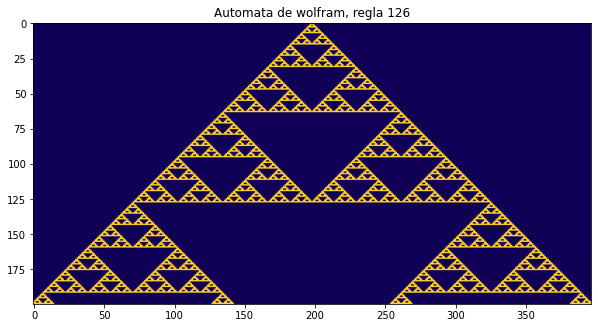

In [3]:
steps = 200
rule = 126
automaton = WolframAutomaton(rule)
automaton.evolve(steps)
automaton.plotWolframAutomaton()

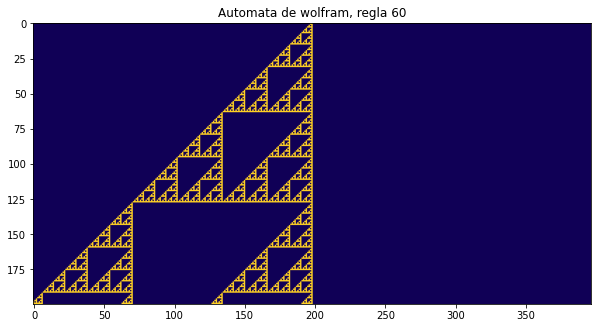

In [4]:
steps = 200
rule = 60
automaton = WolframAutomaton(rule)
automaton.evolve(steps)
automaton.plotWolframAutomaton()

<h3>2.- Autómata celular bidimensional</h3>

In [5]:
class BidimensionalCA:
    
    def __init__(self, initialPattern):
        self.initialPattern = initialPattern
        self.activeCellColor = [1, 0.819, 0.141]
        self.inactiveCellColor = [0.066, 0, 0.341]
        
    def evolve(self, steps):
        gridHeight = 2*steps -1
        gridWidth = 2*steps - 1
        
        evolutionGrid = np.zeros((gridHeight, gridWidth, steps))
        evolutionColorGrid = np.zeros((gridHeight, gridWidth,steps,3))
        evolutionColorGrid[:,:,:,:] = self.inactiveCellColor
        initialPatternWidth = np.size(self.initialPattern, 1)
        initialPatternHeight = np.size(self.initialPattern,0)
        halfInitialPatternWidth = np.floor(initialPatternWidth/2)
        halfInitialPatternHeight = np.floor(initialPatternHeight/2)
        
        initX = int(np.floor(gridHeight/2) - halfInitialPatternWidth)
        initY = int(np.floor(gridWidth/2) - halfInitialPatternHeight)
        #Pintamos el patrón inicial en el centro
        for i in range(0, initialPatternHeight):
            for j in range(0,initialPatternWidth):
                evolutionGrid[initY + i, initX + j,0] = self.initialPattern[i,j]
                if(self.initialPattern[i,j] == 1):
                    evolutionColorGrid[initY + i, initX + j,0,:] = self.activeCellColor
        #Ahora si, realizamos la evolución
        for s in range(1, steps):
            clear_output(wait = True)
            print(s,flush = True)
            for i in range(1,gridHeight-1):
                for j in range(1,gridWidth-1):
                    previousState = evolutionGrid[i,j,s-1]
                    if(previousState == 0):
                        #Sumamos todos los vecinos
                        neighbours = evolutionGrid[i-1,j-1,s-1] + evolutionGrid[i-1,j,s-1] + evolutionGrid[i-1,j+1,s-1] + evolutionGrid[i,j-1,s-1] + evolutionGrid[i,j+1,s-1] + evolutionGrid[i+1,j-1,s-1] + evolutionGrid[i+1,j, s-1] + evolutionGrid[i+1,j+1,s-1]
                        #neighbours = evolutionGrid[i-1,j,s-1] + evolutionGrid[i+1,j,s-1] + evolutionGrid[i,j-1,s-1] + evolutionGrid[i,j+1,s-1]
                        if(neighbours == 1 or neighbours == 2):
                            evolutionGrid[i,j,s] = int(1)
                            evolutionColorGrid[i,j,s,:] = self.activeCellColor
                    else:
                        evolutionGrid[i,j,s] = int(1)
                        evolutionColorGrid[i,j,s,:] = self.activeCellColor
        
        self.evolutionGrid = evolutionGrid
        self.evolutionColorGrid = evolutionColorGrid
        
    def plotFrame(self, i):
        self.ax.clear()
        self.ax.imshow(self.evolutionColorGrid[:,:,i,:])
    
    def buildAnimation(self):
        self.fig,self.ax = plt.subplots(figsize = (10,10))
        fr = np.size(self.evolutionGrid,2)
        print(fr)
        deltaT = 100
        anim = FuncAnimation(self.fig, self.plotFrame, frames = fr, interval = deltaT, blit = False)
        return HTML(anim.to_html5_video())
        
        
        

In [6]:
initialPattern  = np.array([[0,0,0],[0,1,0],[0,0,0]])
bidimensionalCA = BidimensionalCA(initialPattern)
steps = 200
bidimensionalCA.evolve(steps)

199


200


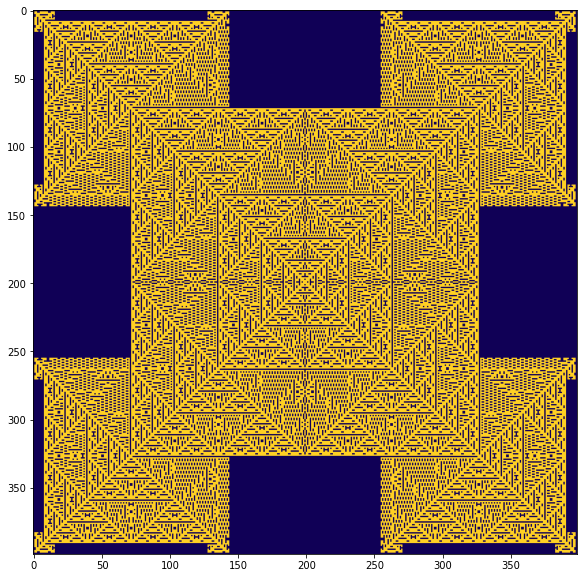

In [7]:
bidimensionalCA.buildAnimation()